# Project: Investigate Medical Appointment No Shows Dataset


### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If this is help, don´t forget to upvote :) Greatings! 

### Content
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, if you have doubts, just let me know! 
scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

### Data Dictionary
PatientId - Identification of a patient; AppointmentID - Identification of each appointment; Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. ;

AppointmentDay = The day of the actuall appointment, when they have to visit the doctor. 

ScheduledDay = The day someone called or registered the appointment, this is before appointment of course.

Age = How old is the patient. Neighbourhood = Where the appointment takes place. 
Scholarship = Ture of False . 

Hipertension = True or False Diabetes = True or False Alcoholism = True or False 
Handcap = True or False 
SMS_received = 1 or more messages sent to the patient. 
No-show = True or False. 

### Inspiration
What if that possible to predict someone to no-show an appointment?

## Data Wrangling 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col=None)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### check the columns' name 

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

change the columns' names to remove typo

In [5]:
df.rename(columns = {'Neighbourhood': 'Neighborhood',
                         'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


Check the null value for each column, it shows there is no null value in each column.

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

Find the duplicate rows of the dataframe. There is no duplicated row.

In [8]:
df.duplicated().sum()

0

Check the data type for each column. We find out that we need to change the type of Gender and days columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighborhood      110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check the value for each genders. The data shows that there are more females' data than males'.

In [9]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Use the map function to change the objective value to dummy variables.

In [10]:
gender = {'M':1, 'F':0}
df['Gender'] = df['Gender'].map(gender)

In [14]:
df.Gender.describe()

count    110527.000000
mean          0.350023
std           0.476979
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Gender, dtype: float64

In [25]:
df[['ScheduledDay', 'AppointmentDay']].head(20)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
5,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z
6,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z
7,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z
8,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z
9,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z


In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [15]:
df['gapDay'] = df['AppointmentDay']- df['ScheduledDay']

In [41]:
df['gapDay'].describe()

count                      110522
mean       9 days 17:09:21.907927
std       15 days 05:51:38.019538
min             -1 days +03:15:06
25%      -1 days +15:41:34.250000
50%        3 days 11:23:40.500000
75%       14 days 07:41:43.250000
max             178 days 13:19:01
Name: gapDay, dtype: object

It seems that most of people will put reservation in three days or more. However, we also find out the appointment day is smaller than the scheduled day. We need to check these odd data.

In [27]:
df_eager = df[df['AppointmentDay'] < df['ScheduledDay']].copy()

There are 38568 data. Therefore, we can not get ride off these data easily. The data, whose Appointment Day is equal to Scheduled Day, might be the patients who is eager to find a doctor.

In [36]:
df_eager[df_eager['AppointmentDay'].dt.date != df_eager['ScheduledDay'].dt.date]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,gapDay
27033,7.839273e+12,5679978,1,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2 days +13:08:07
55226,7.896294e+12,5715660,0,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2 days +09:09:19
64175,2.425226e+13,5664962,0,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2 days +10:16:02
71533,9.982316e+14,5686628,0,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7 days +10:10:40
72362,3.787482e+12,5655637,1,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2 days +17:09:03


In [39]:
drop1 = list(df_eager[df_eager['AppointmentDay'].dt.date != df_eager['ScheduledDay'].dt.date].index)

There is only 5 rows whose appointment contains error message. It might due to system error. We can remove these five rows from origin table. 

In [40]:
df.drop(df.index[drop1], inplace=True)

In [42]:
df.gapDay = (
    (df.gapDay.astype('timedelta64[D]')).astype(int)
    )

In [43]:
df['gapDay'].describe()

count    110522.000000
mean          9.184253
std          15.255115
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: gapDay, dtype: float64

Throught the Gap Day infomation, we can divide the patient into several sub-groups: the same day appointment, within 3 days, within a week, and more than a week less than 2 weeks, and more time for appointment.

In [45]:
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [52]:
df[df['Age']<=0].Age.describe()

count    3540.000000
mean       -0.000282
std         0.016807
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: Age, dtype: float64

In [53]:
df[df['Age']>=100].Age.describe()

count     11.000000
mean     107.181818
std        7.520880
min      100.000000
25%      100.000000
50%      102.000000
75%      115.000000
max      115.000000
Name: Age, dtype: float64

In [11]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

C:\Users\kids1\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
y= df['No-show']
X= df.drop(['Neighborhood','AppointmentDay','No-show','AppointmentID', 'ScheduledDay','PatientId'], axis=1)

In [58]:
def cross_score(model,model_name,n_folds, X, y):
    """
    Function that shows avearge performance 
    with different models and differnt splits in cross validation.

    Args:
        model: machine learning model used, e.g., DecisionTreeClassifier()
        model_name: The name of the machine learning model used, e.g., Decision Tree Classifier.
        n_folds: number of folds used in StratifiedKFold
        X: feature data used in modeling
        y: target data used in modeling
    Returns:
        none
    Printout: 
        the average and the standard deviation of cross validation score with 3 decimal places like the following.
        Decision Tree Classifier with 2 splits has an average score of 0.916 ± 0.038

    """
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print('%s with %d folds has an average score of %.3f ± %.3f' % (model_name, n_folds,s.mean(), s.std()) )

In [61]:
from sklearn.linear_model import LogisticRegression


In [62]:
n=3
cross_score(LogisticRegression(),'Logistic Regression', n, X, y)
cross_score(DecisionTreeClassifier(),'Decision Tree Classifier', n, X, y)
cross_score(BaggingClassifier(),'Bagging Classifier', n, X, y)
cross_score(RandomForestClassifier(),'RandomForest Classifier', n, X, y)
cross_score(ExtraTreesClassifier(),'Extra Trees Classifier', n, X, y)

Logistic Regression with 3 folds has an average score of 0.795 ± 0.000
Decision Tree Classifier with 3 folds has an average score of 0.762 ± 0.002
Bagging Classifier with 3 folds has an average score of 0.760 ± 0.002
RandomForest Classifier with 3 folds has an average score of 0.762 ± 0.002
Extra Trees Classifier with 3 folds has an average score of 0.769 ± 0.001


In [65]:
df_1 = df.drop(['Neighborhood','AppointmentDay','AppointmentID', 'ScheduledDay','PatientId'], axis=1)

In [68]:
df_1['No-show'] = [True if x =="Yes" else False for x in df_1['No-show']]

In [69]:
df_1.sample(10)

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,gapDay
1981,0,59,0,0,0,0,0,0,False,-1
51593,1,0,0,0,0,0,0,0,False,-1
104414,0,35,1,0,0,0,0,1,True,20
37322,1,1,0,0,0,0,0,0,False,-1
55147,0,16,0,0,0,0,0,0,False,-1
49806,1,12,0,0,0,0,0,0,False,-1
71556,0,59,0,0,0,0,0,1,False,6
55146,0,63,0,1,1,1,0,1,True,4
84437,0,55,0,1,1,0,0,1,False,9
75861,0,30,0,0,0,0,0,0,False,5


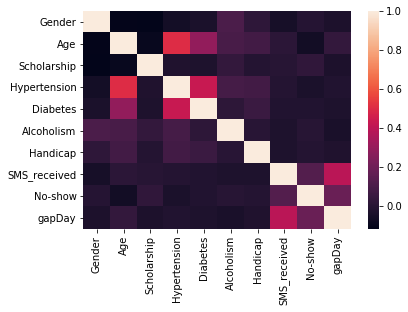

In [71]:
corr = df_1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [77]:
# Fit a logistic regression model and store the class predictions.
logreg = LogisticRegression()

feature_cols = ['gapDay']
X_1 = df_1[feature_cols]
y_1 = df_1["No-show"]

logreg.fit(X_1,y_1)
pred = logreg.predict(X_1)
df_1['pred_prob'] = logreg.predict_proba(X_1)[:, 1]

Text(0,0.5,'No show')

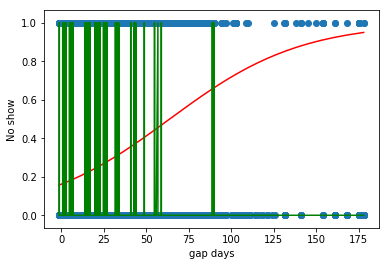

In [80]:
df_1.sort_values('gapDay', inplace=True)

plt.scatter(df_1.gapDay, df_1['No-show'])
plt.plot(df_1.gapDay, df_1.pred_prob, color='red')
plt.plot(df_1.gapDay, pred, color='green')
plt.xlabel('gap days')
plt.ylabel('No show')